In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
import pandas as pd
df = pd.read_csv('../3. Datasets in Pytorch/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
X = df.drop('target', axis=1)
y=df['target']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [17]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
#we need to one-hot encode the target column for multi-class classification problem, but in PyTorch we will use
# CrossEntropy loss, so we don't need to do this
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [7]:
X_train

tensor([[5.0000, 3.4000, 1.6000, 0.4000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.7000, 2.8000, 4.5000, 1

In [10]:
class Model(nn.Module):
    def __init__(self,in_1,h1,h2,out1):
        super().__init__()
        #we're predicting multiple classes so we we'll have 1 hidden layer besides 1 i/p and 1 o/p layer
        self.fc1 = nn.Linear(in_1,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out1)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [11]:
model = Model(4,8,9,3)

In [12]:
#defining our loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [18]:
y_train

tensor([0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2,
        1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0,
        2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0,
        1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2,
        1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [19]:
#training the model: finding apt parameters for our model (weights and biases)
epochs =100
losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # update weights and biases of the model
    if i % 20 ==0:
        print(f' Epoch{i} loss: {loss.item()}')
    

 Epoch20 loss: 0.8228746056556702
 Epoch40 loss: 0.5519895553588867
 Epoch60 loss: 0.44921550154685974
 Epoch80 loss: 0.28115376830101013
 Epoch100 loss: 0.16582468152046204


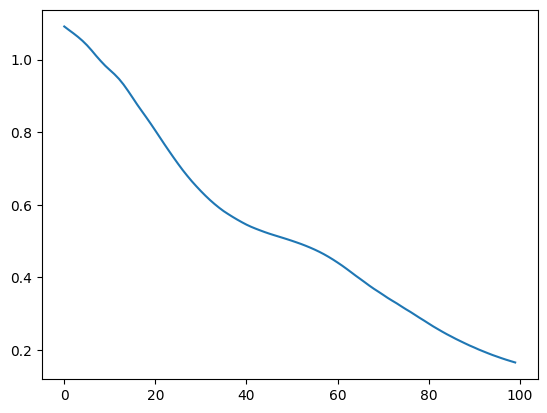

In [21]:
plt.plot(range(epochs), losses)

In [23]:
corrected =0

with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == y_test[i]:
            corrected+=1


print('corrected ',corrected, 'out of ', len(y_test))

corrected  30 out of  30


In [26]:
#save a model:  we can use torch.save() and .load() for loading
#we can just store the model parameters by specifying the model.state_dict()
torch.save(model.state_dict(), './saved_model.pt')

In [29]:
new_model = Model(4,8,9,3)
new_model.load_state_dict(torch.load('./saved_model.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [32]:
#testing it for unseen data:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])
with torch.no_grad():
    y_pred1= model.forward(mystery_iris)
    print(y_pred1)
    labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']
    print(labels[y_pred1.argmax()])

tensor([  7.5903,   4.2250, -13.2278])
Iris setosa
